<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Braden Solt

***

This assignment is due on Moodle by **5 PM on Friday November 9**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [2]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/sealevel_keywest.csv"
file_path  = local_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()

,Year,Month,Day,SL
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [3]:
def clean_data(df):
    dfClean = df
    print( "Missing values are replaced with", min(df['SL']) )
    dfClean[df['SL'] == min(df['SL'])] = float('nan')
#     drop those na
    dfClean = dfClean.dropna()
#     Get only data for the second days
    dfClean = dfClean[dfClean['Day']==2]
    
    
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head()

Missing values are replaced with -32767


,Year,Month,Day,SL
13,1913.0,2.0,2.0,1409.0
41,1913.0,3.0,2.0,1397.0
72,1913.0,4.0,2.0,1402.0
102,1913.0,5.0,2.0,1450.0
133,1913.0,6.0,2.0,1490.0


**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why do we choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

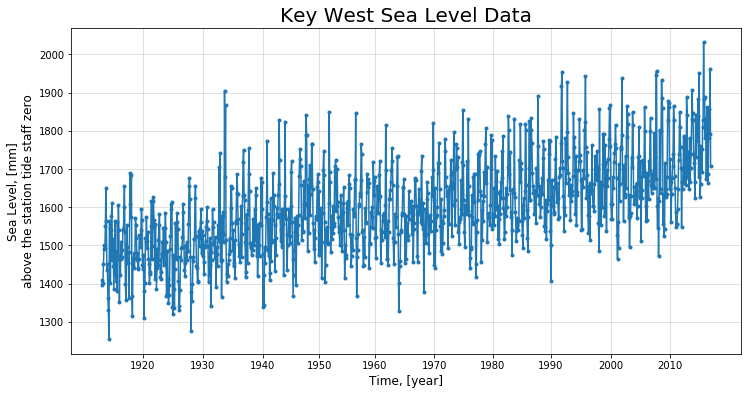

In [5]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0,len(dfClean)),np.array(dfClean['SL']),'.-')
plt.title('Key West Sea Level Data',fontsize=20)
plt.xlabel('Time, [year]',fontsize=12)
plt.ylabel('Sea Level, [mm]\nabove the station tide staff zero',fontsize=12)
plt.grid(alpha=0.5)


# Fix the ticks
btick = np.logical_and(dfClean['Month']==1,dfClean['Year']%10==0)
ticks = np.arange(0,len(dfClean))[btick]
dfClean.head()
# Do this so stupid python doesn't say the year is '1920.0'
labels = ['{:.0f}'.format(y) for y in dfClean['Year'][btick]]
plt.xticks(ticks,labels);

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

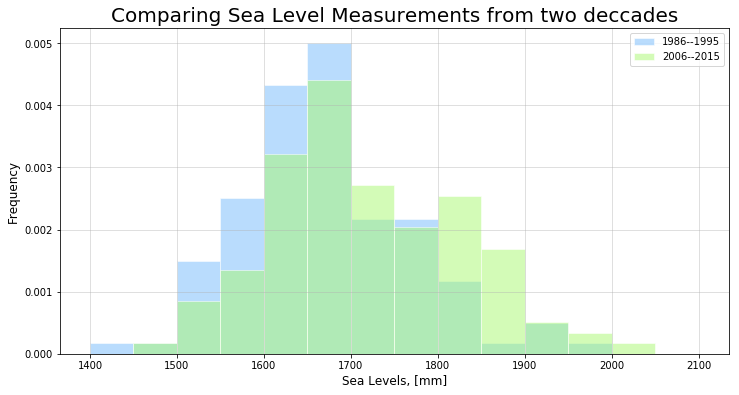

In [6]:
dfOld = dfClean[ np.logical_and(dfClean['Year']>=1986,dfClean['Year']<=1995) ]
dfNew = dfClean[ np.logical_and(dfClean['Year']>=2006,dfClean['Year']<=2015) ]

fig,ax = plt.subplots(1,1,figsize=(12,6))
# ax.set_facecolor('xkcd:charcoal')
b = np.linspace(1400,2100,15)
plt.grid(alpha=0.5)
plt.hist(dfOld['SL'],
         bins=b,
         density=True,
         color='xkcd:sky blue',
         edgecolor='white',
         alpha=0.5,
         label='1986--1995')
plt.hist(dfNew['SL'],
         bins=b,
         density=True,
         color='xkcd:spring green',
         edgecolor='white',
         alpha=0.5,
         label='2006--2015')
plt.legend()
plt.xlabel('Sea Levels, [mm]',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Comparing Sea Level Measurements from two deccades',fontsize=20);


Based on the above plot, I hypothesize that mean sea levels are getting higher. Explitictly, $\mu_{2006-2015}>\mu_{1986-1995}$

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [7]:
from math import sqrt

za = stats.norm.ppf(1-0.0005)
mo = dfOld['SL'].mean()
so = dfOld['SL'].std()
no = len(dfOld['SL'])
print('The confidence interval for mean sea level from 1986--1995 is\n[{:.1f}+-{:.1f}]mm or [{:.1f},{:.1f}]mm'
     .format(mo, za*so/sqrt(no), mo-za*so/sqrt(no), mo+za*so/sqrt(no)))

mn = dfNew['SL'].mean()
sn = dfNew['SL'].std()
nn = len(dfNew['SL'])
print('The confidence interval for mean sea level from 2006--2015 is\n[{:.1f}+-{:.1f}]mm or [{:.1f},{:.1f}]mm'
     .format(mn, za*sn/sqrt(nn), mn-za*sn/sqrt(nn), mn+za*sn/sqrt(nn)))

The confidence interval for mean sea level from 1986--1995 is
[1670.6+-29.6]mm or [1641.0,1700.2]mm
The confidence interval for mean sea level from 2006--2015 is
[1720.7+-33.3]mm or [1687.4,1753.9]mm


The 99.9% confidence intervals for our estimators of the mean can be calculated via application of the central limit theorem and a Box-Muller transform. First, the central limit theorem, which can be applied because we have many data points, states that the distribution of the esitmator $\bar{X}$ can be described by a normal distribution $\text{Norm}(\bar{X},\frac{\sigma^2}{N})$ (desicribed in terms of variance). Because the population standard deviation, $\sigma$ is unknown, the sample standard deviation $s$ is used instead. An application of the Box-Muller transform removes relates this normal distribution to a standard normal distribution. This allows the use of $z_\alpha$ values, where $\alpha$ is half of $\frac{1-99.9\%}{2}$ The final confidence interval is represented by the expression
$$CI_{99.9\%} = \bar{X} \pm z_{0.0005}\frac{s}{\sqrt{N}}$$
These confidence intervals are found by the above code as $1670.6\pm29.6$mm for mean sea level from 1986-1995 and $1720.7\pm33.3$mm for mean sea level from 2006-2015. The sample mean inceases by 50mm between the two deccades' data. Because the extent of both 99.9% confidence intervals is less than 50mm, there is statistical evidence to suggest the means are different.

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

For the esitmator of the ***difference in mean sea level***, another confidence interval can be found. For this estimator, the distribution can be described as $\text{Norm}(\bar{X}-\bar{Y},\frac{\sigma_X^2}{N_X}+\frac{\sigma_Y^2}{N_Y})$. Again the population standard distribution can be replaced by the sample standard deviations for the respective popultions. This confidence interval is solved for below as $50.1\pm44.5$mm. 

This result confirms the hypothesis made in **Part C**, because the 99.9% confidence interval for the difference of means does not contain zero. This means that there is less than an 0.01% chance that this data would be seen under the null hypothesis that the mean sea levels are equal. The results implied from **Part D** are also confirmed. The fact that each sample mean was just outside the confidence interval of the other is equivalent to the fact that zero is not included in the confidence interval for the difference of means.

In [8]:
print('The confidence interval for difference in mean sea levels is\n[{:.1f}+-{:.1f}]mm or [{:.1f},{:.1f}]mm'
     .format(mn-mo, za*sqrt(sn**2/nn+so**2/no), mn-mo-za*sqrt(sn**2/nn+so**2/no), mn-mo+za*sqrt(sn**2/nn+so**2/no) ) )

The confidence interval for difference in mean sea levels is
[50.1+-44.5]mm or [5.6,94.6]mm


**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

The Central Limit Theorem has assumptions of the data being independent and identically distributed. If we took more than one measurement per month, then our samples would not meet theis assumption because they would not be as independent. Sea levels from one day to the next cannot be said to be independent.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

In [9]:
# read either local or web file version; pick whichever works for you
local_file_white = "data/winequality-white.csv"
local_file_red   = "data/winequality-red.csv"
web_file_white = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-white.csv"
web_file_red   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-red.csv"

dfRed   = pd.read_csv(local_file_red, delimiter=';')
dfWhite = pd.read_csv(local_file_white, delimiter=';')

In [10]:
print(len(dfRed),len(dfWhite))
dfRed.head()

1599 4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The Central Limit Thoerem can be applied because there is plenty of data in both datasets.

**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

Confidence inteverals of 95% for proportions can be found just as in the case for means. Because the estimator of interest is now a proportion instead of a mean, the variance for this estimator is based on the variance of a binomial distribution. This can be described by a normal distribution cenereted on the estimator $\hat{p}$ with a variance of $\frac{p(1-p)}{N}$. Simillarly to **Problem 1**, the population proportion $p$, can be estimated by the sample proportion $p$ because the true value is unknown. The confidence interval can be found from once again applying the Box-Muller transform to obtain the $z_\alpha$ values. In this case, for the 95% confidence level, $\alpha=0.005$. The confidence intervals can be expressed as $$CI= \hat{p} \pm z_\alpha \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}$$
This is evalutated below as $13.6\pm2.2$% for red wines and $21.6\pm1.5$% for whites. Based on these results it is reasonable to prefer whites if you are buying wines at random. It is reasonable because the estimated proportion of wines which are high quality is outside the 95% confidence interval for proportion of reds.

In [11]:
za = stats.norm.ppf(1-0.005)

nr = len(dfRed)
pr = (dfRed['quality']>=7).sum()/nr

nw = len(dfWhite)
pw = (dfWhite['quality']>=7).sum()/nw

print('The 95% confidence interval for proportion of red wine above 7 quality is\n[{:.1f}+-{:.1f}]% or [{:.1f},{:.1f}]%'
     .format(100*pr, 100*za*sqrt(pr*(1-pr)/nr), 100*(pr-za*sqrt(pr*(1-pr)/nr)), 100*(pr+za*sqrt(pr*(1-pr)/nr)) ))

print('The 95% confidence interval for proportion of white wine above 7 quality is\n[{:.1f}+-{:.1f}]% or [{:.1f},{:.1f}]%'
     .format(100*pw, 100*za*sqrt(pw*(1-pw)/nw), 100*(pw-za*sqrt(pw*(1-pw)/nw)), 100*(pw+za*sqrt(pw*(1-pw)/nw)) ))

The 95% confidence interval for proportion of red wine above 7 quality is
[13.6+-2.2]% or [11.4,15.8]%
The 95% confidence interval for proportion of white wine above 7 quality is
[21.6+-1.5]% or [20.1,23.2]%


**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Problem 1 - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

In [12]:
za = stats.norm.ppf(1-0.005)

nr = len(dfRed)
pr = (dfRed['quality']>=5).sum()/nr

nw = len(dfWhite)
pw = (dfWhite['quality']>=5).sum()/nw

print('The 95% confidence interval for proportion of red wine above 5 quality is\n[{:.1f}+-{:.1f}]% or [{:.1f},{:.1f}]%'
     .format(100*pr, 100*za*sqrt(pr*(1-pr)/nr), 100*(pr-za*sqrt(pr*(1-pr)/nr)), 100*(pr+za*sqrt(pr*(1-pr)/nr)) ))

print('The 95% confidence interval for proportion of white wine above 5 quality is\n[{:.1f}+-{:.1f}]% or [{:.1f},{:.1f}]%'
     .format(100*pw, 100*za*sqrt(pw*(1-pw)/nw), 100*(pw-za*sqrt(pw*(1-pw)/nw)), 100*(pw+za*sqrt(pw*(1-pw)/nw)) ))

The 95% confidence interval for proportion of red wine above 5 quality is
[96.1+-1.3]% or [94.8,97.3]%
The 95% confidence interval for proportion of white wine above 5 quality is
[96.3+-0.7]% or [95.6,97.0]%


When considering the proportion of wines above a 5 in quality, most reds and whites make the cut. The confidence intervals for these lower standards are calculated above and the results are that $96.1\pm1.3$% of reds are not disgusting and $96.3\pm0.7$% of whites are not disgusting. Based on these results it is reasonable to say that there is no statistical difference between proportions of wines which are above a quality level of 5 between reds and whites.

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

In [13]:
s = sqrt(pr*(1-pr)/nr+pw*(1-pw)/nw)
print('The 95% confidence interval for difference in proportion of wines above 5 quality is\n[{:.1f}+-{:.1f}]% or [{:.1f},{:.1f}]%'
     .format(100*(pr-pw), 100*za*s, 100*(pr-pw-za*s), 100*(pr-pw+za*s) ))

The 95% confidence interval for difference in proportion of wines above 5 quality is
[-0.2+-1.4]% or [-1.6,1.2]%


Instead of computing separate confidence intervals, we can compute one interval for the difference in proportions among samples. For a difference in proportions, the confidence interval is described by 
$$CI = \hat{p_1}-\hat{p_2} \pm z_\alpha \sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{N_1}+\frac{\hat{p_2}(1-\hat{p_2})}{N_2}}$$
This is found in the code above to be $-0.2\pm1.4$%. This interval spans zero, so we cannot say that this difference is statistically significant at the 95%. We can, therefore not conclude that you are better off buying one color over the other. The work here differs from the work in **Part C** because the interval is computed based on the difference of proportions rather than computing an interval for each proportion. This is a more reasonable way to answer this question because it becomes reduced to whether or not zero is contained within this single interval.

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

In [14]:
from math import ceil

Nm = 0.25/(0.01/za)**2
print('The minimum number of sample to ensure 95% confidence interval width is at most 0.01 = {}'.format(ceil(Nm)))

The minimum number of sample to ensure 95% confidence interval width is at most 0.01 = 16588


The width of a confidence interval is equal to $z_\alpha \sqrt{\frac{p(1-p)}{N}}$ where $p$ is the proportion, $N$ is the number of samples, and $z_\alpha$ is the number of standard deviations included. To ensure that this width is at most 0.01, the number of samples must be increased. For this problem, again $p$ is unknown, but it would be irresponsible to assume our old estimators are still valid because more samples are being theorhetically added. Instead of using estimators, we will take p to be the worst case scenario of 0.5. The minimum sample of wines which ensures the width is at most 0.01 is $N_{min}$. It can be solved from $z_\alpha \sqrt{\frac{p(1-p)}{N_{\text{min}}}}\le 0.01$. This is solved by the above code and the result is that at least 16588 samples are needed.

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

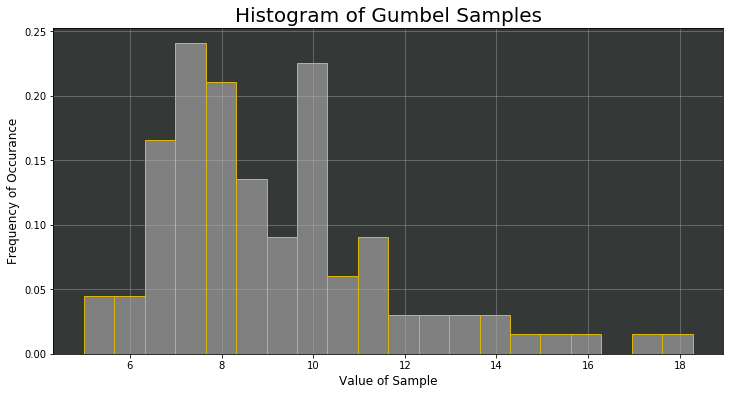

In [24]:
from math import pi
mu = 8
beta = 2
# this needs to be converted to be used with stats
sig = pi*beta/sqrt(6)
n_sample = 100
# your code here
samples = stats.gumbel_r.rvs(loc=mu,scale=beta,size=n_sample)
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.hist(samples,
        bins = 20,
        density = True,
        color = 'gray',
        edgecolor = 'xkcd:gold',
        label='Gumbel Distribution')
plt.grid(alpha=0.5)
plt.title('Histogram of Gumbel Samples',fontsize=20)
plt.xlabel('Value of Sample',fontsize=12)
plt.ylabel('Frequency of Occurance',fontsize=12)
ax.set_facecolor('xkcd:charcoal')

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

The analytical mean of the Gumbel distribution is $\mu + \beta \gamma$. The analytical variance is $\frac{(\pi \beta)^2}{6}$. Via the code below, these values are calculated for $\mu=8$ and $\beta=2$ as 9.154 and 6.580, respectively.

A confidence interval can be found from the empirical mean and analytical variance using the central limit theorem as $\bar{X} \pm z_\alpha\sqrt{\dfrac{(\pi \beta)^2}{6N}}$, where $\bar{X}$ is the sample mean and $N$ is the number of samples. This is also computed in the code below and the result is $[8.845,9.850]$.

In [25]:
mu = 8
beta=2
amean = mu+beta*np.euler_gamma
avar  = (np.pi*beta)**2/6
print(f'The analytical mean is {amean:.5f} and the analytical variance is {avar:.5f}')

xbar = np.mean(samples)
za = stats.norm.ppf(1-.05/2)
pm = za*np.pi*beta/np.sqrt(6*n_sample)
CI = np.array([xbar-pm, xbar+pm])
print(f'The Confidence Interval is {CI}')

The analytical mean is 9.15443 and the analytical variance is 6.57974
The Confidence Interval is [8.66642559 9.67192618]


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

Both **(i)** and **(ii)** are true statements. **(ii)** is the definition of a confidence interval given in class. **(i)** can be shown to be an extension of **(ii)**. If you had no other evidence regarding the true mean of the $Gum(\mu=8,\beta=2)$ distribution, then Stella's interval is just as good as any other. From **(ii)**, we know that 95% of intervals will contain the true mean, and because there's nothing special about Stella's interval, we can say that there is a 95% chance that her interval contains the true mean. Statement **(iii)** is nonsense because the confidence interval describes the location of the mean, not any random variable from the distribution.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

In [17]:
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    amean = mu+beta*np.euler_gamma
    level = 0.66
    
    samples = stats.gumbel_r.rvs(loc=mu,scale=beta,size=(m,n))
    means = np.mean(samples,axis=1)
    za = stats.norm.ppf(1/2+level/2)
    pm = za*np.pi*beta/np.sqrt(6*n)
    
    lowers = means-pm
    uppers = means+pm
    coverage = np.logical_and(lowers<amean,uppers>amean)
    proportion_CIs_covering_mean = coverage.sum()/m
    
    print("proportion covering mean: {:.3f}".format(proportion_CIs_covering_mean))
    
    
confidence_intervals(m=500000,n=100)

proportion covering mean: 0.659


**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yes, the proportion of confidence intervals agrees with the theory. The theory is that the proportion agrees with the confidence level. These values all agree.

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

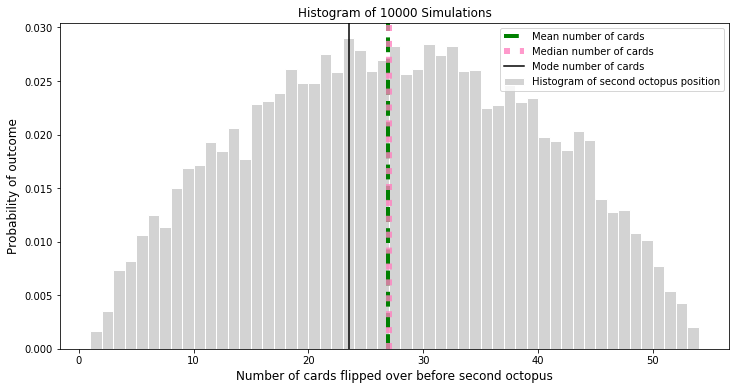

In [18]:
deck = np.arange(0,55) #let the octopus cards be the last three cards
# Define N as number of simulations
N = 10000
#Pick those cards with a random.choice N times
cards = np.array([np.random.choice(deck,size=55,replace=False) for i in range(N)])
# Make this boolean for which cards are octopus
octopus = cards>51
# Make this array for ordering the octopus cards
accumulated = octopus.cumsum(axis=1)
# Make this list to find where the second octopus is in each simulation
second_oct = np.argmax(accumulated>1,axis=1)

# Do a plotting thing
fig,ax = plt.subplots(1,1,figsize=(12,6))
plt.hist(second_oct,
        bins=np.arange(1,55),
        density=True,
        color='lightgray',
        edgecolor='white',
        label='Histogram of second octopus position')
x,x,ymin,ymax = plt.axis('tight')

plt.plot(np.mean(second_oct)*np.array([1,1]),[ymin,ymax],'g--',
        linewidth=4,
        label='Mean number of cards')
plt.plot(np.median(second_oct)*np.array([1,1]),[ymin,ymax],':',
        color='xkcd:pink',
        linewidth=6,
        alpha = 0.8,
        label='Median number of cards')
#Find the mode with bincount
mode = (np.bincount(second_oct).argmax()+0.5)
plt.plot(mode*np.array([1,1]),[ymin,ymax],'k-',
        label='Mode number of cards')
plt.xlabel('Number of cards flipped over before second octopus',fontsize=12)
plt.ylabel('Probability of outcome',fontsize=12)
plt.title(f'Histogram of {N} Simulations')
plt.legend();


**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

A 99% confidence interval is wider. 

It is wider because we want to be more sure we are correct. In order to be more sure we have to consider a wider range of answers.

Okay, let me try again. We want to be right. We will be more right if we are less specific. More often I mean. This is why the 99% confidence interval is wider.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In [19]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [22]:
# #Let's bootstrap this thing Actually no, it doesn't work?????????
# #Do N of 10,000
# N = 100000
# level = 0.95
# #Make those straps
# boots = np.random.choice( durant,size=(N,len(durant)) )
# all_std = np.std(boots,axis=1)
# lower = np.percentile(all_std,100*(1/2-level/2),axis=0)
# upper = np.percentile(all_std,100*(1/2+level/2),axis=0)
# CI = np.array([lower, upper])
# print(f'The confidence interval is {CI}')
# print(np.diff(CI))
# print(np.std(durant)) 

level = 0.95
xm = stats.chi2.ppf(1/2+level/2,df=len(durant)-1)
xp = stats.chi2.ppf(1/2-level/2,df=len(durant)-1)
s = np.std(durant)
m = np.sqrt((len(durant)-1)*s**2/xm)
p = np.sqrt((len(durant)-1)*s**2/xp)
CI = np.array([m,p])
print(f'The confidence interval is {CI}')

The confidence interval is [0.07412531 0.19673887]


**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

In the case of quality control for the strength of the carbon fiber, a Type II error is more dangerous because it represents the event where the null hypothesis is not rejected but is in fact false. With relation to this problem, a Type II error represents the event that the carbon fiber is deemed strong enough but is not actually strong enough. Your plane is going to fall apart in this event (or at least have a reduced lifespan.) For this reason it is more important to have a lower Type II error rate.

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

In [21]:
xb1 = 52.8; s1 = 22.8; N1=52
xb2 = 45.2; s2 = 30.4; N2=41

alpha = 0.05
mid = xb1-xb2
za = stats.norm.ppf(1-alpha/2)
pm = za*np.sqrt(s1**2/N1+s2**2/N2)

CI = np.array([mid-pm,mid+pm])

print(f'CI for difference of means is {CI}')

CI for difference of means is [-3.57994294 18.77994294]


The test performed here will be a confidence interval for the difference of means. The confidence interval for this test is represented by the following expression
$$\mu_1-\mu_2 \approx \bar{X}_1-\bar{X}_2 \pm z_\alpha \sqrt{\frac{S_1^2}{N_1}+\frac{S_2^2}{N_2}}$$
This is computed by the code above. Because the confidence interval includes 0, the difference in mean sucker size is not significantly significant at the 95% confidence level.